# **Detección de síndrome del ojo seco empleando atributos del estilo de vida de la persona y variables medicas**

**Integrantes:**

**Grupo E2:**

*   2215636: Greyler Jose Chacon Chaparro
*   2221551: Jonk Keyler Sanchez Pabon


**Grupo E1:**
*    2220085: Samuel David Traslaviña Mateus  






## Introducción

El síndrome o enfermedad del ojo seco , es una afección frecuente que afecta la pelicula lagrimal , esta es una capa líquida que recubre la córnea y la conjuntiva del ojo.

![images.jpg](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQU4FnFQ-bCEpi2II7OeCB7wSPmnf6B-CAhuw&s)

Sucede cuando no se tienen suficientes lágrimas , son inestables e inclusive se evaporan muy rapido , esto conlleva en inflamación y daño en la superficie ocular , recondando que las lágrimas mantienen la supercie del ojo húmeda , evitando la irritación , estabilizando la visión y protegiendo de infecciones y agentes externos (polvo,pequeñas particulas,etc).

## Causas

Las causas del síndrome del ojo seco pueden ser variadas , pero , engloban situaciones que alteran la película lagrimal sana , entre ellas se tienen :
- Menor producción de lágrimas : No se tiene la capacidad de producir suficientes lágrimas por factores como envejecimiento , falta de vitamina A , ciertos medicamentos , lentes de contacto o cirugías previas en los ojos.

- Evaporación rápida de las lágrimas : Puede ser causada por factores como el viento seco, el humo , el aire acondicionado , el uso de pantallas digitales por periodos prolongados , alergias que afectan el ojo , pestañear con menos frecuencia.

## Objetivo

La enfermedad puede tener diferentes factores de riesgos que pueden estar relacionados a los hábitos que tiene la persona , como tiempo de exposición a pantallas , actividad fisica , edad , antecedentes medicos ,entre otros , por lo cual , si se cuentan con registros de estos factores para diferentes pacientes con y sin la enfermedad , se puede lograr usar herramientas de IA para ayudar a prevenir la enfermedad o detectarla a tiempo.

Este proyecto tiene como objetivo :

**Desarrollar de un modelo de Machine Learning que permita predecir si una persona tiene o no el síndrome del ojo seco (Clasificación binaria)**, basado en:

- Factores de riesgo relacionados con el estilo de vida:
    Tiempo de exposición a pantallas.
    Actividad física.
    Hábitos de alimentación.
    Consumo de alcohol y tabaco.

- Variables médicas:
    Edad.
    Antecedentes de enfermedades.
    Uso de lentes de contacto o cirugías previas.
    Salud ocular en general.

## Descripción del dataset
El dataset contiene información sobre los hábitos de sueño, actividad física y factores de salud de 20,000 sujetos, con el objetivo de analizar su relación con la enfermedad del ojo seco (_Dry Eye Disease_). Incluye variables demográficas como género y edad, métricas de salud como presión arterial y frecuencia cardíaca, y factores de estilo de vida como consumo de cafeína, alcohol y uso de dispositivos electrónicos antes de dormir. La variable a predecir es ```Dry Eye Disease```, que indica si un sujeto padece esta afección.

### Información General
Nombre: Dry Eye Disease
<br>Autor: dakshnagra
<br>Disponible en: https://www.kaggle.com/datasets/dakshnagra/dry-eye-disease

### Clasificación de las variables
#### Por tipo de dato
- Variables cualitativas nominales:
<br> Gender / Sleep_disorder / Wake_up_during_night / Feel_sleepy_during_day / Caffeine_consumption / Alcohol_consumption / Smoking / Medical_issue / Ongoing_medication / Smart_device_before_bed / Blue-light_filter / Discomfort_Eye-strain / Redness_in_eye / Itchiness_Irritation_in_eye / Dry_Eye_Disease

- Variables cuantitativas discretas:
<br> Age / Heart_rate / Daily_steps / Sleep_quality / Stress_level

- Variables cuantitativas continuas:
<br> Sleep_duration / Blood_pressure / Physical_activity / Height / Weight / Average_screen_time

#### Por temática
- Variables demográficas:
<br> Age / Gender

- Variables biométricas / fisiológicas:
<br> Height / Weight / Heart_rate / Blood_pressure

- Variables de hábitos y estilo de vida:
<br> Daily_steps / Physical_activity / Caffeine_consumption / Alcohol_consumption / Smoking / Smart_device_before_bed / Average_screen_time / Blue-light_filter

- Variables relacionadas con el sueño:
<br> Sleep_duration / Sleep_quality / Sleep_disorder / Wake_up_during_night / Feel_sleepy_during_day

- Variables de salud general:
<br> Stress_level / Medical_issue / Ongoing_medication

- Variables relacionadas con la salud ocular:
<br> Discomfort_Eye-strain / Redness_in_eye / Itchiness_Irritation_in_eye / Dry_Eye_Disease

## Importar los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
sns.set_context('notebook')

## Carga de datos

In [3]:
url='https://drive.google.com/uc?export=download&id=1rsinyuJoJesd_UyrLaD0u-ECzJH4PHFA'

In [4]:
df=pd.read_csv(url)
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


## **EDA**

El dataset cuenta con 20000 registros y 26 *features* o columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

La tarea principal que se desea llevar acabo es la detección de síndrome del ojo , por lo cual , la *feature* ```Dry Eye Disease```

### Valores Faltantes

In [6]:
print('Missing Values',df.isna().sum().sort_values(ascending=False)[:20],sep='\n')

Missing Values
Gender                         0
Age                            0
Itchiness/Irritation in eye    0
Redness in eye                 0
Discomfort Eye-strain          0
Blue-light filter              0
Average screen time            0
Smart device before bed        0
Ongoing medication             0
Medical issue                  0
Smoking                        0
Alcohol consumption            0
Caffeine consumption           0
Feel sleepy during day         0
Wake up during night           0
Sleep disorder                 0
Weight                         0
Height                         0
Physical activity              0
Daily steps                    0
dtype: int64


No existen valores faltantes en el dataset

### Estadisticas Descriptivas

In [7]:
df.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [8]:
categorical_features=df.select_dtypes(include='object').columns
numerical_features=df.select_dtypes(include='number').columns

In [9]:
categorical_features.shape

(16,)

In [10]:
numerical_features.shape

(10,)

Se cuentan con 16 variables categoricas y 10 variables numericas.

Histograma que permite visualizar la distribución de las edades de los pacientes en la muestra.

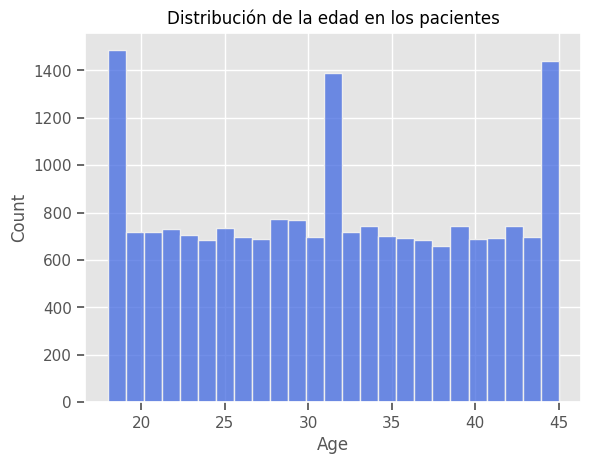

In [69]:
sns.histplot(df['Age'],color="royalblue")
plt.title('Distribución de la edad en los pacientes')
plt.show()

Gráfico de caja que permite analizar la distribución de la altura de los pacientes en la muestra

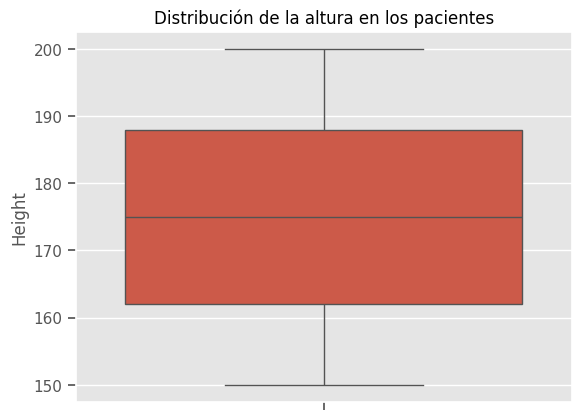

In [70]:
sns.boxplot(data=df,y='Height')
plt.title('Distribución de la altura en los pacientes')
plt.show()

Gráfico de torta que muestra la distribución de los niveles de calidad del sueño en la muestra de pacientes

In [ ]:
sleep=df['Sleep quality'].value_counts()
plt.pie(sleep.values,labels=sleep.index,autopct='%1.2f%%')
plt.title('Distibución de los niveles de calidad del sueño')
plt.show()

Histograma para visualizar la distribución de la duración del sueño en los pacientes

In [ ]:
sns.histplot(data=df,x='Sleep duration',color="royalblue")
plt.title('Duración promedio del sueño en horas')
plt.show()

Gráfico de tortas para visualizar la proporción de pacientes según su género en el dataset

In [ ]:
val_per_gender=df['Gender'].value_counts()
plt.pie(val_per_gender.values,labels=val_per_gender.index,autopct='%1.2f%%',colors=["#4450ec","#e74fea"])
plt.title('Distribución de género en los pacientes')
plt.show()

Histograma que revela la distribución del número de pasos diarios en los pacientes, permitiendo identificar tendencias generales en su actividad física

In [ ]:
sns.histplot(df['Daily steps'],bins=20,color="green")
plt.title('Distribución de los pasos diarios')
plt.show()

Este grafico de caja sirve para analizar la distribución del tiempo promedio de exposición a pantallas en las personas

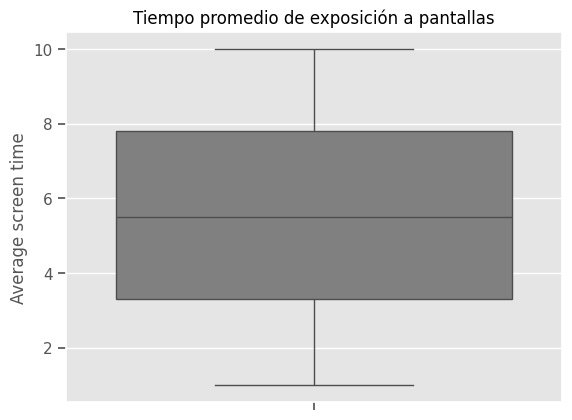

In [75]:
sns.boxplot(data=df,y='Average screen time',color='grey')
plt.title('Tiempo promedio de exposición a pantallas')
plt.show()

Gráfico de caja  para visualizar la distribución de la frecuencia cardíaca en la población.

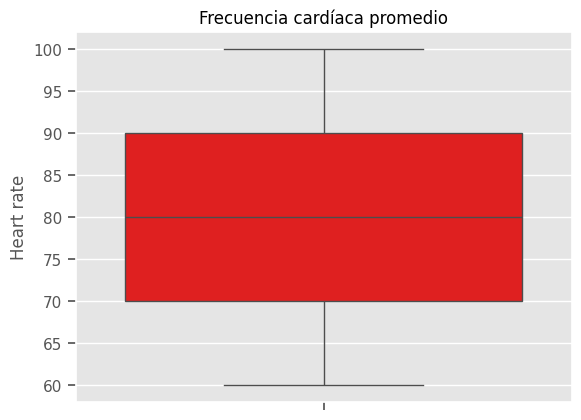

In [76]:
sns.boxplot(data=df,y='Heart rate',color="red")
plt.title('Frecuencia cardíaca promedio')
plt.show()

Este gráfico de torta permite identificar la distribución porcentual de los niveles de estrés entre las personas.

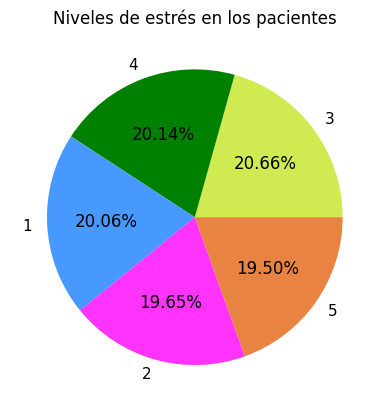

In [77]:
stress=df['Stress level'].value_counts()
plt.pie(stress.values,labels=stress.index,autopct='%1.2f%%',colors=['#cfeb51','green','#4798ff','#ff33fc','#e88341'])
plt.title('Niveles de estrés en los pacientes')
plt.show()

In [ ]:
for elem in categorical_features:
    if elem!='Gender' and elem!='Blood pressure':
        sns.countplot(data=df,x=elem,hue=elem,legend=False,palette='bright')
        plt.title(f'Distribución de {elem}')
        plt.show()

Este gráfico tiene como finalidad explorar la relación entre la edad y la cantidad de pasos diarios en pacientes con y sin Enfermedad del Ojo Seco (Dry Eye Disease, DED)

In [ ]:
steps_log=np.log1p(df['Daily steps'])
sns.relplot(x='Age',y=steps_log,data=df,hue='Dry Eye Disease',palette='viridis')
plt.title('Age vs Daily Steps')
plt.show()

El gráfico de cajas proporciona información sobre cómo varía el tiempo promedio de exposición a pantallas en pacientes con y sin DED, considerando además la presencia de trastornos del sueño.

In [ ]:
sns.catplot(data=df,y='Average screen time',x='Dry Eye Disease',hue='Dry Eye Disease',col='Sleep disorder',kind='box')
plt.show()

Para evaluar la posible relación entre el uso de dispositivos inteligentes antes de dormir, el uso de filtro de luz azul, y la presencia de Enfermedad del Ojo Seco (Dry Eye Disease, DED), se generó un gráfico de barras categórico.

In [ ]:
sns.catplot(data=df,x='Smart device before bed',kind='count',col='Blue-light filter',hue='Dry Eye Disease')
plt.show()

**El gráfico muestra la distribución de pacientes fumadores y no fumadores en cada grupo de Dry Eye Disease. Esto permite observar si existe una diferencia en la proporción de fumadores dentro de los grupos de pacientes con y sin la enfermedad.**

In [ ]:
sns.catplot(data=df,x='Smoking',kind='count',col='Dry Eye Disease')
plt.show()

Gráfico de barras categórico para visualizar la distribución de los niveles de estrés en los pacientes y su posible relación con la enfermedad del ojo seco (Dry Eye Disease).

In [ ]:
sns.catplot(x='Stress level',kind='count',data=df,hue='Dry Eye Disease',palette='winter')
plt.show()

### Feature Engineering
La ingeniería de características es el proceso en el cual a partir de los datos originales se crean nuevas variables que pueden ser más útiles para el modelo de Machine Learning.

In [6]:
df[['Systolic_BP','Diastolic_BP']]=df['Blood pressure'].str.split('/',expand=True)

In [7]:
df[['Systolic_BP','Diastolic_BP']]=df[['Systolic_BP','Diastolic_BP']].astype(int)
df[['Systolic_BP','Diastolic_BP']].describe()

,Systolic_BP,Diastolic_BP
count,20000.000000,20000.000000
mean,114.985450,74.999300
std,14.725589,8.975034
min,90.000000,60.000000
25%,102.000000,67.000000
50%,115.000000,75.000000
75%,128.000000,83.000000
max,140.000000,90.000000


Este grafico permite evaluar si existe una diferencia significativa en la presión sistólica entre pacientes con y sin enfermedad del ojo seco

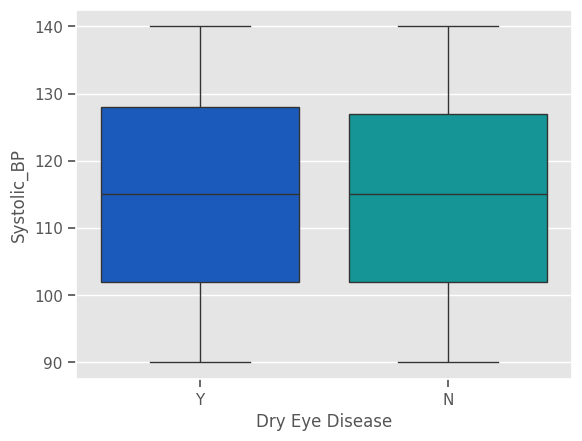

In [86]:
sns.boxplot(data=df,x='Dry Eye Disease',y='Systolic_BP',palette='winter',hue='Dry Eye Disease')
plt.show()

Gráfico de caja para comparar la distribución de la presión arterial diastólica (Diastolic_BP) en pacientes con y sin enfermedad del ojo seco (Dry Eye Disease).

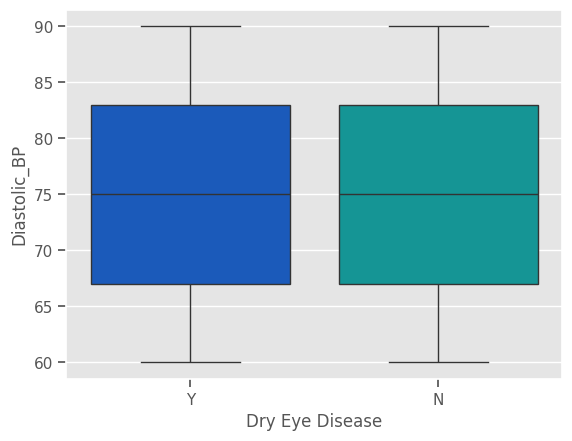

In [87]:
sns.boxplot(data=df,x='Dry Eye Disease',y='Diastolic_BP',palette='winter',hue='Dry Eye Disease')
plt.show()

In [88]:
df.pivot_table(index='Dry Eye Disease',values=['Physical activity','Sleep quality','Age','Heart rate'],aggfunc='mean')

,Age,Heart rate,Physical activity,Sleep quality
Dry Eye Disease,,,,
N,31.364498,79.945857,90.305185,3.006894
Y,31.453939,79.894224,89.944006,2.992099


## **Modelos Clásicos**

Recordando , el objetivo del proyecto es desarrollar un modelo de Machine Learning que permita predecir si una persona tiene o no el síndrome del ojo seco (Clasificación binaria), basado en los factores de riesgo relacionados con el estilo de vida y las variables médicas.Entonces la tarea principal es la **clasificación binaria**, por lo cual se usaran diferentes algoritmos de clasificación para evaluar su desempeño y elegir el mejor modelo.

### Preprocesamiento

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
df.drop(labels=['Blood pressure','Daily steps'],axis=1,inplace=True)

In [13]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Physical activity,Height,Weight,Sleep disorder,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,67,31,161,69,Y,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,60,74,164,87,N,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,95,93,179,94,Y,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,78,32,160,77,N,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,72,173,179,99,N,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [14]:
categorical_features=df.select_dtypes(include='object').columns
for col in categorical_features:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [15]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Physical activity,Height,Weight,Sleep disorder,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,0,24,9.5,2,1,67,31,161,69,1,...,0,1,1,0,8.7,0,1,1,0,1
1,1,39,9.6,2,3,60,74,164,87,0,...,0,1,1,0,9.6,1,0,0,1,1
2,0,45,5.4,1,5,95,93,179,94,1,...,0,0,0,1,4.0,0,1,0,0,0
3,0,45,5.4,4,5,78,32,160,77,0,...,0,1,0,0,7.6,0,1,0,1,0
4,0,42,5.7,3,2,72,173,179,99,0,...,0,1,0,0,3.5,0,1,1,0,1


Se define el vector $X$ que contiene todas las variables predictoras y el vector $y$ que contiene la variable objetivo o tambien conocida como *ground truth*.

In [16]:
X=df.drop(labels=['Dry Eye Disease'],axis=1)
y=df['Dry Eye Disease']
X.shape,y.shape

((20000, 23), (20000,))

Se dividen los datos en conjuntos de entrenamiento y prueba, utilizando un 80% de los datos para entrenamiento y un 20% para prueba. Se aplica escalado a las variables numéricas para mejorar el rendimiento de los modelos

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
y_train.value_counts()

Dry Eye Disease
1    10344
0     5656
Name: count, dtype: int64

In [19]:
y_test.value_counts()

Dry Eye Disease
1    2693
0    1307
Name: count, dtype: int64

In [20]:
X_train_s=X_train.copy()
X_test_s=X_test.copy()
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train_s)
X_test_s=sc.transform(X_test_s)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def plot_confusion_matrix(y_test,y_pred,clases,title='Confusion Matrix'):
    cm=confusion_matrix(y_test,y_pred)
    fig,ax=plt.subplots()
    disp=ConfusionMatrixDisplay(cm,display_labels=clases)
    disp.plot(cmap='Blues',ax=ax,colorbar=True)
    ax.set_title(title)
    ax.grid(False)
    plt.show()

### Modelos sin hiperparámetros

#### Desicion Tree

In [20]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
cm2=confusion_matrix(y_test,y_pred,labels=model2.classes_)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred),sep='\n')

Accuracy: 0.571
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.38      0.36      1307
           1       0.69      0.67      0.68      2693

    accuracy                           0.57      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.58      0.57      0.57      4000



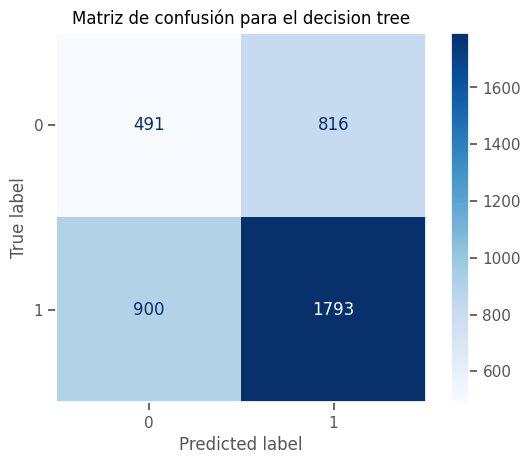

In [21]:
plot_confusion_matrix(y_test,y_pred,model2.classes_,'Matriz de confusión para el decision tree')

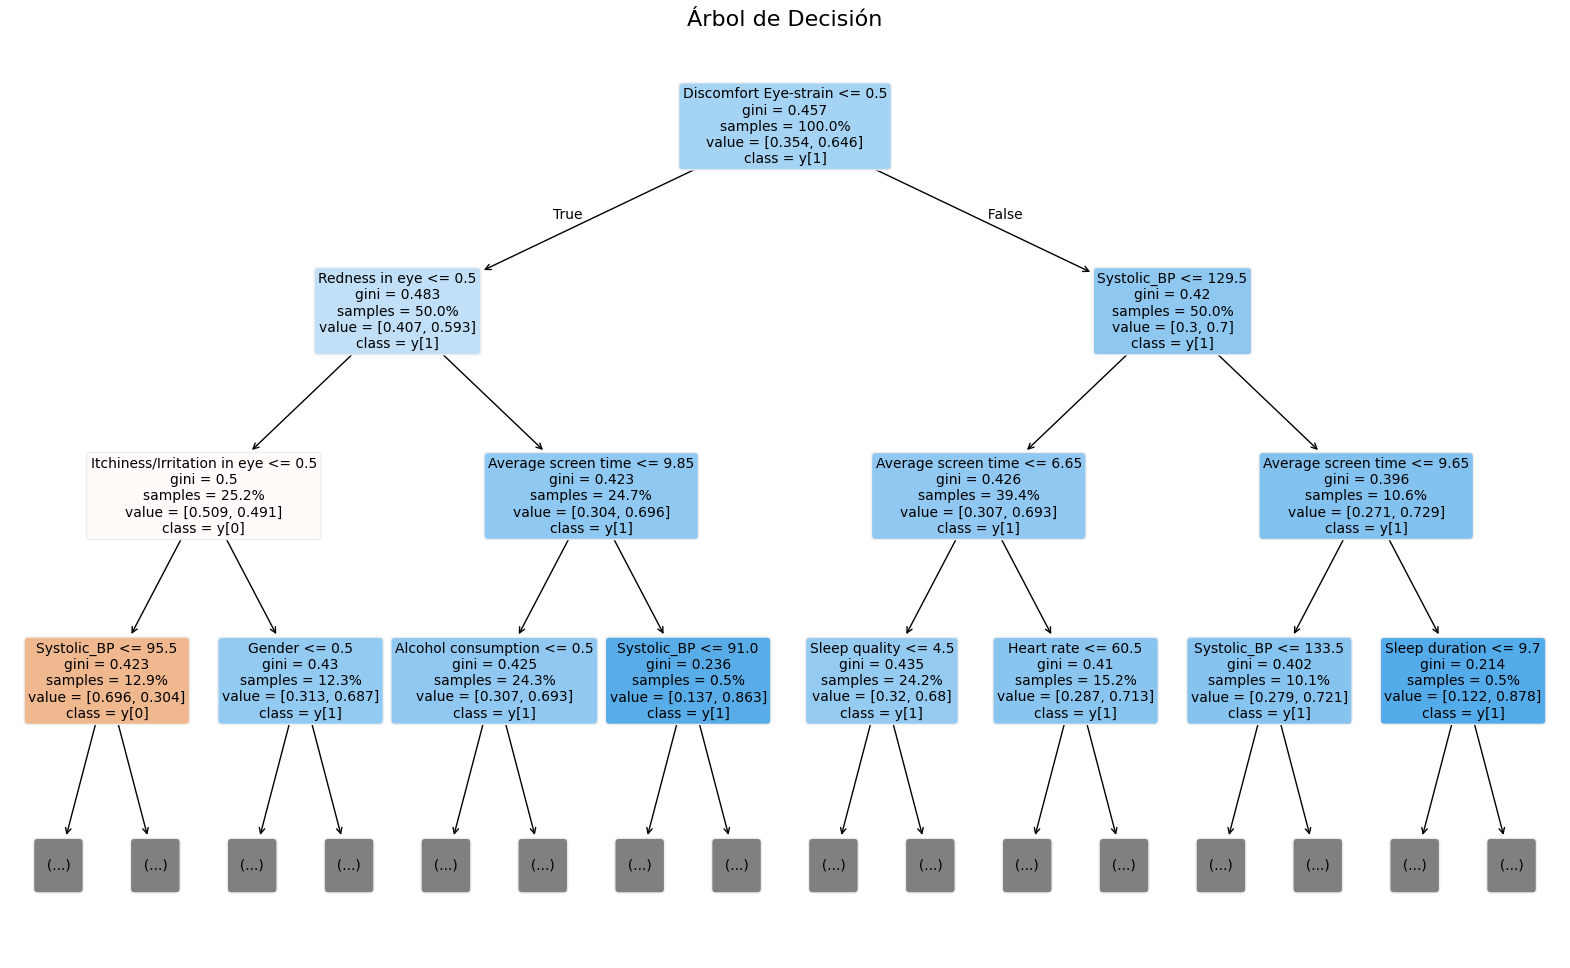

In [35]:
plt.figure(figsize=(20,12))  
plot_tree(
    model2,
    feature_names=X.columns.to_list(),
    class_names=True,   
    filled=True,        
    rounded=True,        
    proportion=True,     
    fontsize=10,       
    max_depth=3       
)
plt.title('Árbol de Decisión', fontsize=16)
plt.show()

In [23]:
feature_importance=pd.DataFrame({'feature':X.columns.to_list(),'importance':model2.feature_importances_}).sort_values(by='importance',ascending=False)
feature_importance

,feature,importance
6,Physical activity,0.092765
2,Sleep duration,0.090455
18,Average screen time,0.089291
8,Weight,0.081700
24,Diastolic_BP,0.077841
7,Height,0.076738
23,Systolic_BP,0.076672
5,Heart rate,0.073439
1,Age,0.070114
22,Itchiness/Irritation in eye,0.053169


In [24]:
del y_pred

#### Random Forest

In [25]:
model3=RandomForestClassifier()
model3.fit(X_train_s,y_train)
y_pred=model3.predict(X_test_s)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred),sep='\n')

Accuracy: 0.69925
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.22      0.33      1307
           1       0.71      0.93      0.81      2693

    accuracy                           0.70      4000
   macro avg       0.66      0.58      0.57      4000
weighted avg       0.68      0.70      0.65      4000



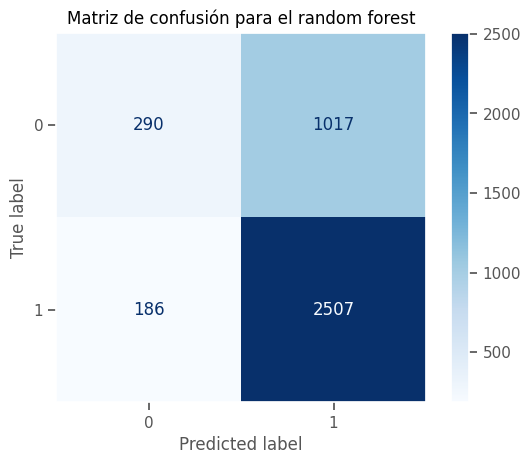

In [26]:
plot_confusion_matrix(y_test,y_pred,model3.classes_,'Matriz de confusión para el random forest')

In [27]:
importances = model3.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
6,Physical activity,0.084992
18,Average screen time,0.082650
2,Sleep duration,0.078888
8,Weight,0.077837
23,Systolic_BP,0.076728
7,Height,0.076578
5,Heart rate,0.074859
24,Diastolic_BP,0.070622
1,Age,0.069558
3,Sleep quality,0.035072


In [28]:
del y_pred

#### Support Vector Machine

In [29]:
model4=SVC()
model4.fit(X_train_s,y_train)
y_pred=model4.predict(X_test_s)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred),sep='\n')

Accuracy: 0.7015
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.22      0.33      1307
           1       0.71      0.93      0.81      2693

    accuracy                           0.70      4000
   macro avg       0.67      0.58      0.57      4000
weighted avg       0.68      0.70      0.65      4000



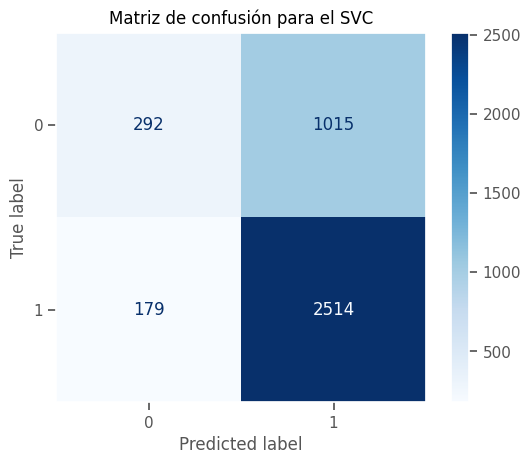

In [30]:
plot_confusion_matrix(y_test,y_pred,model4.classes_,'Matriz de confusión para el SVC')

### Curvas de aprendizaje

#### Curva de aprendizaje para el modelo de Desicion Tree
Parametro : ```max_depth```

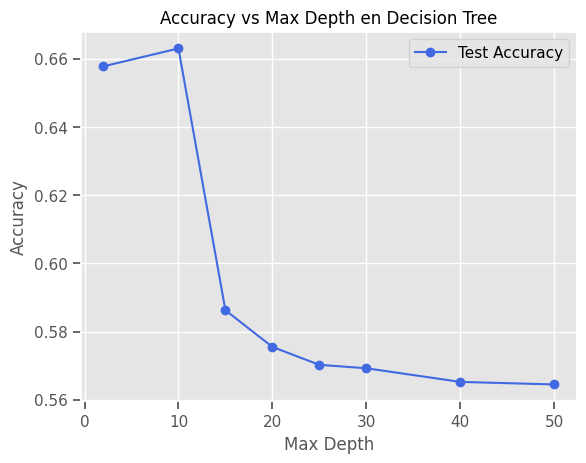

In [31]:
max_depth = [2, 10, 15, 20, 25, 30, 40, 50]
test_accuracy, cv_mean, cv_std = [], [], []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(y_test,y_pred))
    del y_pred

plt.plot(max_depth, test_accuracy, marker='o', color='royalblue',label='Test Accuracy')

plt.title('Accuracy vs Max Depth en Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Curva de aprendizaje para el modelo de Random Forest
Parametro : ```n_estimators```

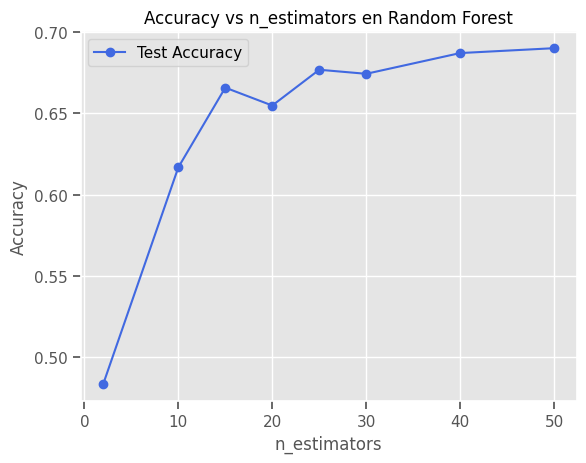

In [32]:
n_estimators = [2, 10, 15, 20, 25, 30, 40, 50]
test_accuracy, cv_mean, cv_std = [], [], []

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    test_accuracy.append(accuracy_score(y_test, y_pred))
    del y_pred

plt.plot(n_estimators, test_accuracy, marker='o', color='royalblue', label='Test Accuracy')

plt.title('Accuracy vs n_estimators en Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Curva de aprendizaje para el modelo de Support Vectorial Machine
Parametro : ```kernels```

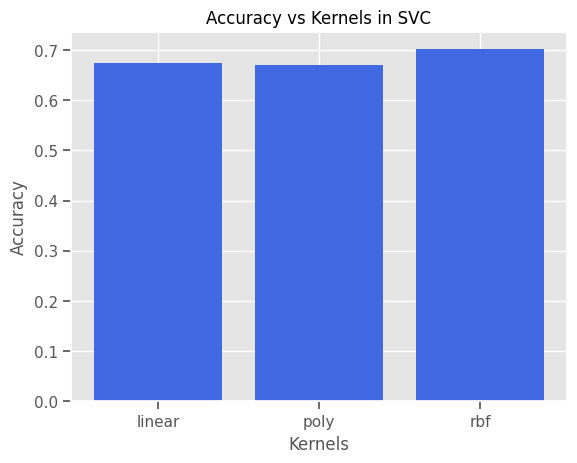

In [33]:
kernels=['linear','poly','rbf']
accuracy_scores=[]
for k in kernels:
  temp_model=SVC(kernel=k)
  temp_model.fit(X_train_s,y_train)
  y_pred=temp_model.predict(X_test_s)
  accuracy_scores.append(accuracy_score(y_test,y_pred))
  del y_pred

plt.bar(kernels,accuracy_scores,color='royalblue')
plt.title('Accuracy vs Kernels in SVC')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.show()

### Curva de aprendizaje para la validación cruzada para el desicion tree

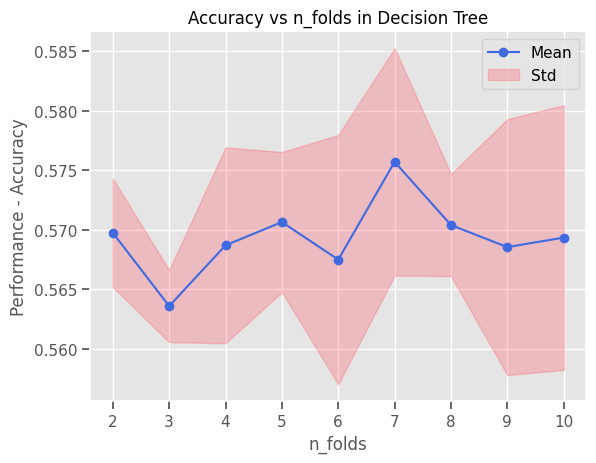

In [34]:
from sklearn.model_selection import KFold
means,std=[],[]
n_folds_range=range(2,11)
for n_folds in n_folds_range:
    model_temp=DecisionTreeClassifier()
    score=cross_val_score(model_temp,X,y,cv=KFold(n_folds,shuffle=True,random_state=42),scoring='accuracy')
    means.append(score.mean())
    std.append(score.std())

means=np.r_[means]
stds=np.r_[std]
plt.plot(n_folds_range,means,marker='o',color='royalblue',label='Mean')
plt.fill_between(n_folds_range,means-stds,means+stds,alpha=0.3,color='#ff5a6b',label='Std')
plt.title('Accuracy vs n_folds in Decision Tree')
plt.xlabel('n_folds')
plt.ylabel('Performance - Accuracy')
plt.legend()
plt.show()

## **Deep Learning**

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.show()

In [43]:
modeld1=Sequential([
    tf.keras.Input(shape=(X_train_s.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1,activation='sigmoid')])
modeld1.compile(optimizer=Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
history1=modeld1.fit(X_train_s,y_train,epochs=10,batch_size=16,validation_split=0.2,verbose=1)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6383 - loss: 0.6486 - val_accuracy: 0.6678 - val_loss: 0.6373
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6781 - loss: 0.6251 - val_accuracy: 0.6756 - val_loss: 0.6325
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6834 - loss: 0.6220 - val_accuracy: 0.6869 - val_loss: 0.6289
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6948 - loss: 0.6127 - val_accuracy: 0.6831 - val_loss: 0.6266
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7009 - loss: 0.6041 - val_accuracy: 0.6888 - val_loss: 0.6254
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7028 - loss: 0.5943 - val_accuracy: 0.6888 - val_loss: 0.6247
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7129 - loss: 0.5849 - val_accuracy: 0.6909 - val_loss: 0.6247
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6972 - loss: 0.5942 - val_accuracy: 0.

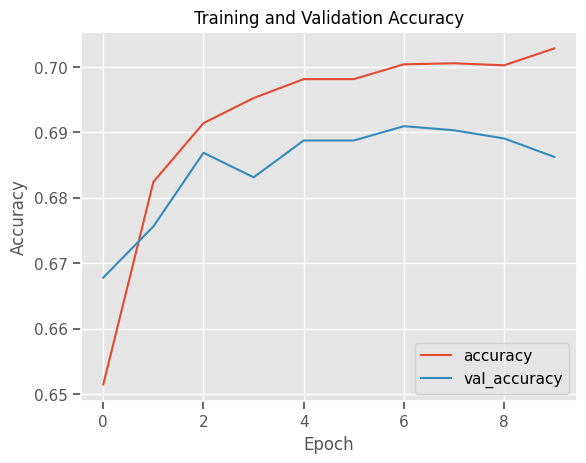

In [44]:
plot_history(history1)

In [45]:
y_pred_probs=modeld1.predict(X_test_s)
y_pred_class=np.where(y_pred_probs>=0.5,1,0)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


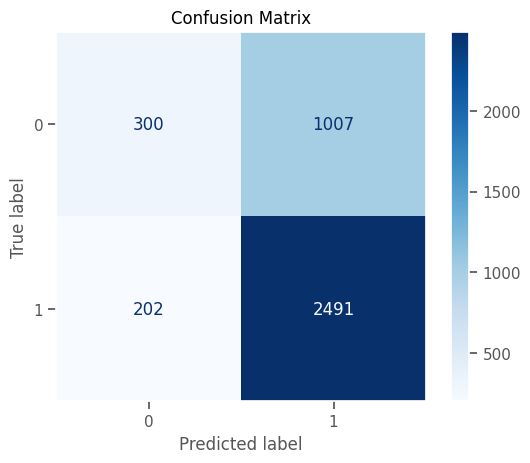

In [46]:
plot_confusion_matrix(y_test,y_pred_class,[0,1],title='Confusion Matrix')

In [47]:
modeld2=Sequential([
    tf.keras.Input(shape=(X_train_s.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1,activation='sigmoid')])
modeld2.compile(optimizer=Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
history2=modeld2.fit(X_train_s,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6257 - loss: 0.6603 - val_accuracy: 0.6369 - val_loss: 0.6440
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6732 - loss: 0.6236 - val_accuracy: 0.6822 - val_loss: 0.6280
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6919 - loss: 0.6141 - val_accuracy: 0.6878 - val_loss: 0.6222
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7018 - loss: 0.6035 - val_accuracy: 0.6900 - val_loss: 0.6218
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7028 - loss: 0.5996 - val_accuracy: 0.6906 - val_loss: 0.6223
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7008 - loss: 0.5950 - val_accuracy: 0.6828 - val_loss: 0.6265
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7022 - loss: 0.5913 - val_accuracy: 0.6878 - val_loss: 0.6278
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7065 - loss: 0.5803 - val_accuracy: 0.

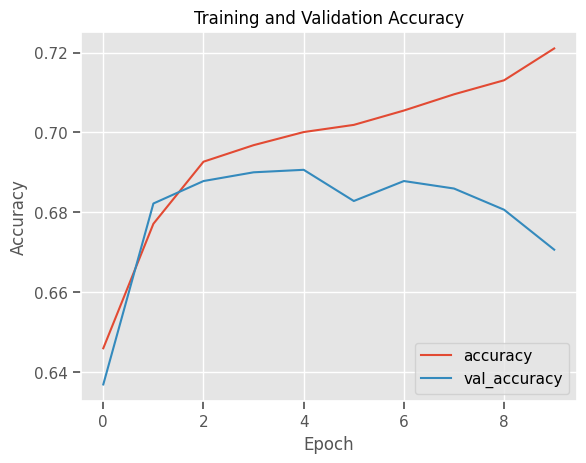

In [48]:
plot_history(history2)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


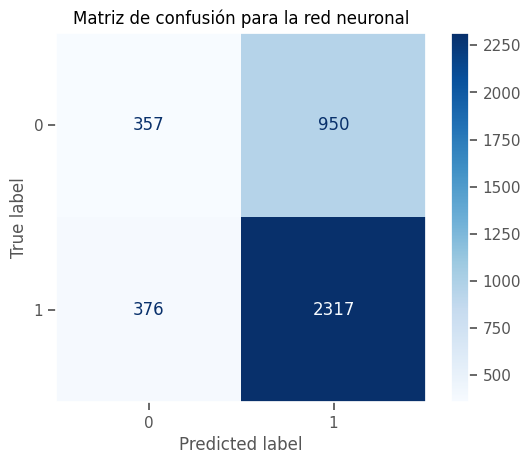

In [51]:
y_pred_probs=modeld2.predict(X_test_s)
y_pred_class=np.where(y_pred_probs>=0.5,1,0)
plot_confusion_matrix(y_test,y_pred_class,[0,1],'Matriz de confusión para la red neuronal')

In [58]:
modeld3=Sequential([
    tf.keras.Input(shape=(X_train_s.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1,activation='sigmoid')])
modeld3.compile(optimizer=Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
history3=modeld3.fit(X_train_s,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6398 - loss: 0.6549 - val_accuracy: 0.6366 - val_loss: 0.6450
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6670 - loss: 0.6267 - val_accuracy: 0.6837 - val_loss: 0.6250
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7041 - loss: 0.6022 - val_accuracy: 0.6844 - val_loss: 0.6234
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6991 - loss: 0.6011 - val_accuracy: 0.6812 - val_loss: 0.6249
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7080 - loss: 0.5948 - val_accuracy: 0.6728 - val_loss: 0.6368
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7090 - loss: 0.5881 - val_accuracy: 0.6731 - val_loss: 0.6441
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7313 - loss: 0.5588 - val_accuracy: 0.6687 - val_loss: 0.6562
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7433 - loss: 0.5431 - val_accuracy: 0.

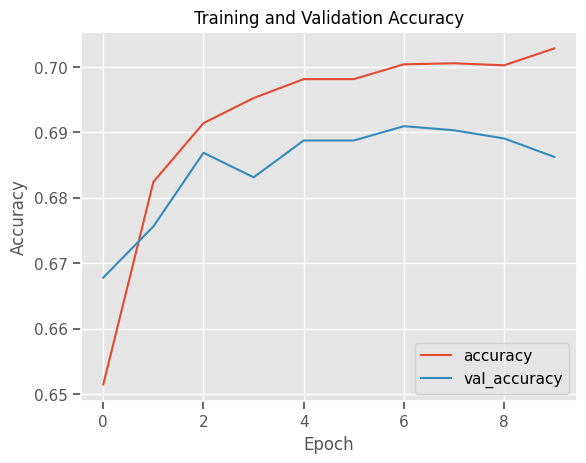

In [59]:
plot_history(history1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


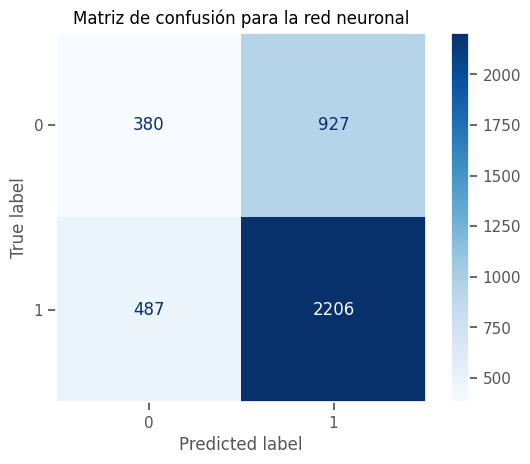

In [60]:
y_pred_probs=modeld3.predict(X_test_s)
y_pred_class=np.where(y_pred_probs>=0.5,1,0)
plot_confusion_matrix(y_test,y_pred_class,[0,1],'Matriz de confusión para la red neuronal')